<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center> 

_____


# A basic data frame

In [1]:
import pandas as pd
lena=pd.read_csv("https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/data/lenha.csv")

#see
lena

,Departamento,Provincia,Distrito,lenha_pct,code,key
0,Amazonas,Chachapoyas,Chachapoyas,0.246202,10101,AMAZONAS_CHACHAPOYAS_CHACHAPOYAS
1,Amazonas,Chachapoyas,Asunción,0.942308,10102,AMAZONAS_CHACHAPOYAS_ASUNCION
2,Amazonas,Chachapoyas,Balsas,0.853521,10103,AMAZONAS_CHACHAPOYAS_BALSAS
3,Amazonas,Chachapoyas,Cheto,0.818182,10104,AMAZONAS_CHACHAPOYAS_CHETO
4,Amazonas,Chachapoyas,Chiliquin,0.956311,10105,AMAZONAS_CHACHAPOYAS_CHILIQUIN
...,...,...,...,...,...,...
1869,Ucayali,Padre Abad,Irazola,0.545455,250302,UCAYALI_PADRE ABAD_IRAZOLA
1870,Ucayali,Padre Abad,Curimana,0.726645,250303,UCAYALI_PADRE ABAD_CURIMANA
1871,Ucayali,Padre Abad,Neshuya,0.507532,250304,UCAYALI_PADRE ABAD_NESHUYA
1872,Ucayali,Padre Abad,Alexander Von Humboldt,0.511197,250305,UCAYALI_PADRE ABAD_ALEXANDER VON HUMBOLDT


In [2]:
import geopandas as gpd

distmap=gpd.read_file("/vsicurl/https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/peru_shp_distritos1874/DISTRITOS1874.shp")

In [3]:
distmap

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."
...,...,...,...,...,...
1869,LIMA,LIMA,CIENEGUILLA,IGN,"POLYGON ((-76.72917 -11.99948, -76.72596 -11.9..."
1870,LIMA,LIMA,ANCON,IGN,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5..."
1871,LIMA,LIMA,CARABAYLLO,IGN,"POLYGON ((-76.89892 -11.72963, -76.89768 -11.7..."
1872,CALLAO,CALLAO,MI PERU,IGN,"POLYGON ((-77.11491 -11.84189, -77.11450 -11.8..."


In [4]:
distmap['key']=['_'.join(DPd) for DPd in zip(distmap.DEPARTAMEN,distmap.PROVINCIA,distmap.DISTRITO)]
distmap['key']=distmap.key.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
distmap.key=distmap.key.str.upper().str.strip()
distmap.key=distmap.key.str.replace(r'  ',' ',regex=True)

In [18]:
lenaMap=distmap.merge(lena, on='key').loc[:,['key','DEPARTAMEN','PROVINCIA','DISTRITO','lenha_pct','geometry']]
lenaMap

,key,DEPARTAMEN,PROVINCIA,DISTRITO,lenha_pct,geometry
0,TACNA_TACNA_CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,0.090590,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA_TACNA_POCOLLAY,TACNA,TACNA,POCOLLAY,0.124197,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA_TACNA_CALANA,TACNA,TACNA,CALANA,0.566914,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA_TACNA_TACNA,TACNA,TACNA,TACNA,0.052440,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA_TACNA_SAMA,TACNA,TACNA,SAMA,0.427014,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."
...,...,...,...,...,...,...
1869,LIMA_LIMA_CIENEGUILLA,LIMA,LIMA,CIENEGUILLA,0.134573,"POLYGON ((-76.72917 -11.99948, -76.72596 -11.9..."
1870,LIMA_LIMA_ANCON,LIMA,LIMA,ANCON,0.070872,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5..."
1871,LIMA_LIMA_CARABAYLLO,LIMA,LIMA,CARABAYLLO,0.050134,"POLYGON ((-76.89892 -11.72963, -76.89768 -11.7..."
1872,CALLAO_CALLAO_MI PERU,CALLAO,CALLAO,MI PERU,0.029458,"POLYGON ((-77.11491 -11.84189, -77.11450 -11.8..."


In [6]:
#lenaMap.set_index('key',inplace=True,drop=False)

In [19]:
lenaMap

,key,DEPARTAMEN,PROVINCIA,DISTRITO,lenha_pct,geometry
0,TACNA_TACNA_CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,0.090590,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA_TACNA_POCOLLAY,TACNA,TACNA,POCOLLAY,0.124197,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA_TACNA_CALANA,TACNA,TACNA,CALANA,0.566914,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA_TACNA_TACNA,TACNA,TACNA,TACNA,0.052440,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA_TACNA_SAMA,TACNA,TACNA,SAMA,0.427014,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."
...,...,...,...,...,...,...
1869,LIMA_LIMA_CIENEGUILLA,LIMA,LIMA,CIENEGUILLA,0.134573,"POLYGON ((-76.72917 -11.99948, -76.72596 -11.9..."
1870,LIMA_LIMA_ANCON,LIMA,LIMA,ANCON,0.070872,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5..."
1871,LIMA_LIMA_CARABAYLLO,LIMA,LIMA,CARABAYLLO,0.050134,"POLYGON ((-76.89892 -11.72963, -76.89768 -11.7..."
1872,CALLAO_CALLAO_MI PERU,CALLAO,CALLAO,MI PERU,0.029458,"POLYGON ((-77.11491 -11.84189, -77.11450 -11.8..."


In [20]:
from libpysal.weights import Queen, Rook, KNN

In [22]:
w_rook = Rook.from_dataframe(lenaMap)

In [23]:
w_queen = Queen.from_dataframe(lenaMap)

In [24]:
w_knn = KNN.from_dataframe(lenaMap,k=4)

In [25]:
w_queen.islands

[89, 122]

In [26]:
w_queen.islands

[89, 122]

In [27]:
w_knn.islands

[]

<Axes: >

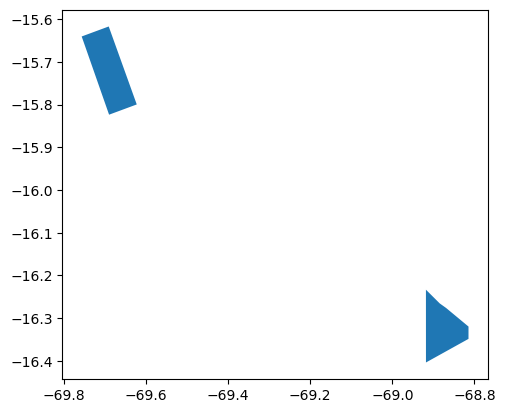

In [29]:
lenaMap.loc[w_rook.islands,:].plot()

In [30]:
w_rook.n

1874

In [33]:
w_rook.cardinalities

{0: 1,
 1: 4,
 2: 3,
 3: 7,
 4: 3,
 5: 6,
 6: 4,
 7: 3,
 8: 5,
 9: 5,
 10: 5,
 11: 6,
 12: 5,
 13: 6,
 14: 4,
 15: 4,
 16: 5,
 17: 9,
 18: 4,
 19: 5,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 5,
 25: 8,
 26: 2,
 27: 4,
 28: 4,
 29: 4,
 30: 3,
 31: 4,
 32: 3,
 33: 4,
 34: 9,
 35: 7,
 36: 10,
 37: 2,
 38: 4,
 39: 8,
 40: 3,
 41: 5,
 42: 4,
 43: 5,
 44: 3,
 45: 5,
 46: 4,
 47: 4,
 48: 5,
 49: 2,
 50: 5,
 51: 4,
 52: 5,
 53: 8,
 54: 9,
 55: 6,
 56: 5,
 57: 7,
 58: 9,
 59: 4,
 60: 7,
 61: 6,
 62: 6,
 63: 6,
 64: 5,
 65: 5,
 66: 5,
 67: 5,
 68: 5,
 69: 5,
 70: 5,
 71: 4,
 72: 4,
 73: 5,
 74: 7,
 75: 9,
 76: 6,
 77: 6,
 78: 6,
 79: 3,
 80: 2,
 81: 4,
 82: 7,
 83: 5,
 84: 4,
 85: 3,
 86: 2,
 87: 5,
 88: 6,
 89: 0,
 90: 4,
 91: 2,
 92: 5,
 93: 3,
 94: 2,
 95: 6,
 96: 5,
 97: 6,
 98: 3,
 99: 9,
 100: 6,
 101: 5,
 102: 9,
 103: 5,
 104: 2,
 105: 9,
 106: 4,
 107: 7,
 108: 8,
 109: 4,
 110: 9,
 111: 10,
 112: 6,
 113: 5,
 114: 3,
 115: 5,
 116: 3,
 117: 6,
 118: 3,
 119: 7,
 120: 5,
 121: 6,
 122: 0,
 

In [34]:
w_rook.histogram

[(0, 2),
 (1, 5),
 (2, 39),
 (3, 164),
 (4, 339),
 (5, 431),
 (6, 376),
 (7, 241),
 (8, 138),
 (9, 81),
 (10, 32),
 (11, 9),
 (12, 9),
 (13, 5),
 (14, 3)]

In [36]:

pd.Series(w_rook.histogram).plot.bar(color="k");

TypeError: no numeric data to plot

In [ ]:
w_rook.nonzero

In [ ]:
ax = lenaMap.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(lenaMap, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()